# Analysis: Trained FNN Models

Which model performs the best so far?

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
# Models to compare

#model = ('../src/train/trained_models/one_hidden_mfcc_zcr_energy_rmse_bpm.pt')
#model = ('../src/train/trained_models/one_hidden_mfcc_zcr_energy_rmse_bpm_128.pt')
#model = ('../src/train/trained_models/one_hidden_mfcc_zcr_energy_rmse_bpm_256.pt')
#model = ('../src/train/trained_models/two_hidden_mfcc_zcr_energy_rmse_bpm.pt')

#model = ('../src/train/trained_models/one_hidden_mfcc_128.pt')
#model = ('../src/train/trained_models/two_hidden_mfcc.pt')
#model = ('../src/train/trained_models/one_hidden_mfcc_bpm_128.pt')
#model = ('../src/train/trained_models/two_hidden_mfcc_bpm.pt')


## Validation Results

Models tested on validation data set

In [14]:
t1 = pd.read_csv('../src/predict/predictions/true_two_hidden_test_mfcc_bpm.csv', names=['True'])
r1 = pd.read_csv('../src/predict/predictions/two_hidden_test_mfcc_bpm.csv', names=['Pred'])

t2 = pd.read_csv('../src/predict/predictions/true_one_hidden_test_mfcc_bpm_128.csv', names=['True'])
r2 = pd.read_csv('../src/predict/predictions/one_hidden_test_mfcc_bpm_128.csv', names=['Pred'])

t3 = pd.read_csv('../src/predict/predictions/true_two_hidden_test_mfcc.csv', names=['True'])
r3 = pd.read_csv('../src/predict/predictions/two_hidden_test_mfcc.csv', names=['Pred'])

t4 = pd.read_csv('../src/predict/predictions/true_one_hidden_test_mfcc_128.csv', names=['True'])
r4 = pd.read_csv('../src/predict/predictions/one_hidden_test_mfcc_128.csv', names=['Pred'])

t5 = pd.read_csv('../src/predict/predictions/true_one_hidden_test_mfcc_zcr_energy_rmse_bpm_256.csv', names=['True'])
r5 = pd.read_csv('../src/predict/predictions/one_hidden_test_mfcc_zcr_energy_rmse_bpm_256.csv', names=['Pred'])

t6 = pd.read_csv('../src/predict/predictions/true_one_hidden_test_mfcc_zcr_energy_rmse_bpm_128.csv', names=['True'])
r6 = pd.read_csv('../src/predict/predictions/one_hidden_test_mfcc_zcr_energy_rmse_bpm_128.csv', names=['Pred'])

t7 = pd.read_csv('../src/predict/predictions/true_two_hidden_test_mfcc_zcr_energy_rmse_bpm.csv', names=['True'])
r7 = pd.read_csv('../src/predict/predictions/two_hidden_test_mfcc_zcr_energy_rmse_bpm.csv', names=['Pred'])

t8 = pd.read_csv('../src/predict/predictions/true_one_hidden_test_mfcc_zcr_energy_rmse_bpm.csv', names=['True'])
r8 = pd.read_csv('../src/predict/predictions/one_hidden_test_mfcc_zcr_energy_rmse_bpm.csv', names=['Pred'])

In [17]:
results1 = pd.concat([r1, t1], axis = 1)
results2 = pd.concat([r2, t2], axis = 1)
results3 = pd.concat([r3, t3], axis = 1)
results4 = pd.concat([r4, t4], axis = 1)
results5 = pd.concat([r5, t5], axis = 1)
results6 = pd.concat([r6, t6], axis = 1)
results7 = pd.concat([r7, t7], axis = 1)
results8 = pd.concat([r8, t8], axis = 1)

In [21]:
df_list = [results1, results2, results3, results4, results5, results6, results7, results8]
acc_list = []
for df in df_list:
    acc_list.append(accuracy_score(y_true=df['True'], y_pred=df['Pred']))

In [23]:
torch_results = pd.DataFrame(acc_list, columns=['Accuracy'])
torch_results.index = [ 'model_1',
                        'model_2',
                        'model_3',
                        'model_4',
                        'model_5',
                        'model_6',
                        'model_7',
                        'model_8']

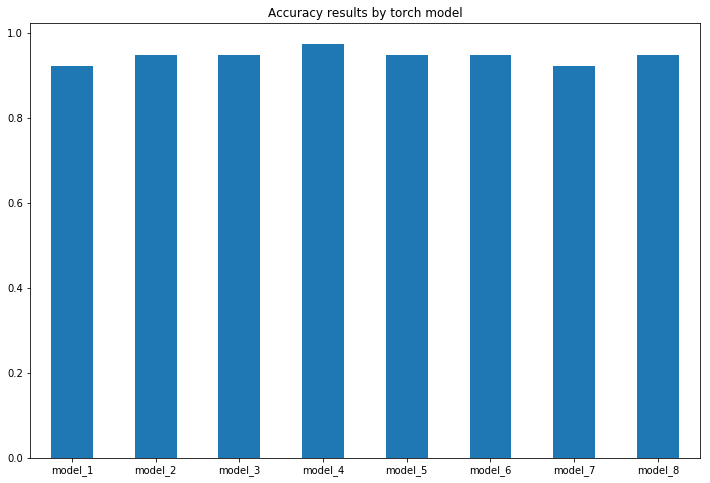

In [25]:
ax = torch_results.plot.bar(legend=False,  figsize=(12,8), rot=0)
ax.set_title('Accuracy results by torch model');

In [32]:
torch_results

,Accuracy
model_1,0.921053
model_2,0.947368
model_3,0.947368
model_4,0.973684
model_5,0.947368
model_6,0.947368
model_7,0.921053
model_8,0.947368
